# Импорты и загрузки

## Импорты

In [1]:
!pip install faiss-cpu

In [121]:
pip install CatBoost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import faiss
from tqdm.notebook import tqdm
from sklearn.preprocessing import RobustScaler, StandardScaler

In [87]:
import zipfile
import requests
from urllib.parse import urlencode
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [120]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

RANDOM_STATE = 12345

## Загрузка данных из yandex.drive на виртуальный диск Colab

#### data.zip все *.csv появляются слева на вкладке

## Подготоавливаем словарь для корректной загрузки типов данных. По умолчанию загружается float64, мы используем float32

In [4]:
dict_base = {}
for i in range(72):
    dict_base[str(i)] = 'float32'
dict_base
dict_train = dict_base.copy()
dict_valid = dict_base.copy()
dict_valid_target =  dict_base.copy()
dict_train['Target'] = 'str'

## Base dataset

In [5]:

try:
    df_base = pd.read_csv("C:/Users/pavki/Downloads//base.csv", index_col=0, dtype=dict_base)

    df_base.head()
except:
    df_base = pd.read_csv('/Users/pavelkislov/Downloads/base.csv', index_col=0, dtype=dict_base)
    df_base.head()


In [6]:
df_base.shape

(2918139, 72)

In [7]:
df_base[['0','1','2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918139 entries, 0-base to 4744766-base
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float32
 1   1       float32
 2   2       float32
dtypes: float32(3)
memory usage: 55.7+ MB


## Train dataset

In [8]:

try:
    df_train = pd.read_csv("C:/Users/pavki/Downloads//train.csv", index_col=0, dtype=dict_train)

    df_train.head()
except:
    df_train = pd.read_csv('/Users/pavelkislov/Downloads/train.csv', index_col=0, dtype=dict_train)
    df_train.head()
df_train.shape

(100000, 73)

In [9]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,Target
Id,,,,,,,,,,,,,,,,,,,,,
0-query,-53.882748,17.971436,-42.117104,-183.936676,187.517487,-87.144928,-347.360596,38.307602,109.085564,30.413513,...,70.107361,-155.802567,-101.965942,65.903793,34.457500,62.642094,134.763596,-415.750244,-25.958572,675816-base
1-query,-87.776367,6.806268,-32.054546,-177.260391,120.803329,-83.810593,-94.572746,-78.433090,124.915901,140.331070,...,4.669178,-151.697708,-1.638704,68.170876,25.096191,89.974976,130.589630,-1035.092163,-51.276833,366656-base
2-query,-49.979565,3.841486,-116.118591,-180.401978,190.128433,-50.837620,26.943937,-30.447489,125.771164,211.607819,...,78.039764,-169.146194,82.144188,66.008217,18.400496,212.409729,121.931473,-1074.464844,-22.547178,1447819-base
3-query,-47.810562,9.086598,-115.401695,-121.011360,94.652840,-109.255409,-775.150146,79.186523,124.003098,242.650650,...,44.515266,-145.416748,93.990982,64.131348,106.061920,83.178757,118.277725,-1074.464844,-19.902788,1472602-base
4-query,-79.632126,14.442886,-58.903397,-147.052536,57.127068,-16.239529,-321.317963,45.984676,125.941284,103.392670,...,45.028912,-196.092072,-117.626335,66.926224,42.456169,77.621765,92.479927,-1074.464844,-21.149351,717819-base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995-query,-68.180527,11.657515,-63.179722,-188.726532,131.113098,-65.125343,-514.276855,95.990753,118.761185,-5.635696,...,38.573555,-133.087128,14.040794,66.477341,-36.148731,61.689774,107.037949,-1074.464844,-35.128250,811868-base
99996-query,-66.540894,2.201112,-70.292114,-146.167847,77.817139,-47.525654,-118.994690,-25.183374,131.499817,183.260880,...,33.324959,-110.576416,-84.448524,65.818100,-30.268772,133.783997,154.495865,-1144.590942,-108.663513,1460772-base
99997-query,-53.948238,4.726887,-29.278950,-147.182831,264.090668,-101.135628,-427.544037,68.057564,118.084312,192.449249,...,-14.146965,-184.663834,22.971384,67.347801,110.437103,35.785603,111.616707,-714.897705,-4.270569,2366140-base


In [10]:
def dupli_and_isna(dataset):
    print('Количество пропусков:')
    print(dataset.isna().sum())
    print('Количество дубликатов:', dataset.duplicated().sum())

In [11]:
dupli_and_isna(df_base)

Количество пропусков:
0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    0
69    0
70    0
71    0
Length: 72, dtype: int64
Количество дубликатов: 0


In [12]:
dupli_and_isna(df_train)

Количество пропусков:
0         0
1         0
2         0
3         0
4         0
         ..
68        0
69        0
70        0
71        0
Target    0
Length: 73, dtype: int64
Количество дубликатов: 0


In [13]:
try:
    df_valid = pd.read_csv("C:/Users/pavki/Downloads/validation.csv", index_col=0, dtype=dict_valid)
    df_valid_target = pd.read_csv("C:/Users/pavki/Downloads/validation_answer.csv", index_col=0,
                                  dtype=dict_valid_target)
except:
    df_valid = pd.read_csv("/Users/pavelkislov/Downloads/validation.csv", index_col=0, dtype=dict_valid)
    df_valid_target = pd.read_csv("/Users/pavelkislov/Downloads/validation_answer.csv", index_col=0, 
                                  dtype=dict_valid_target)

In [14]:
df_valid_target

,Expected
Id,
100000-query,2676668-base
100001-query,91606-base
100002-query,472256-base
100003-query,3168654-base
100004-query,75484-base
...,...
199995-query,967418-base
199996-query,1344948-base
199997-query,1690782-base


In [15]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 100000-query to 199999-query
Data columns (total 72 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float32
 1   1       100000 non-null  float32
 2   2       100000 non-null  float32
 3   3       100000 non-null  float32
 4   4       100000 non-null  float32
 5   5       100000 non-null  float32
 6   6       100000 non-null  float32
 7   7       100000 non-null  float32
 8   8       100000 non-null  float32
 9   9       100000 non-null  float32
 10  10      100000 non-null  float32
 11  11      100000 non-null  float32
 12  12      100000 non-null  float32
 13  13      100000 non-null  float32
 14  14      100000 non-null  float32
 15  15      100000 non-null  float32
 16  16      100000 non-null  float32
 17  17      100000 non-null  float32
 18  18      100000 non-null  float32
 19  19      100000 non-null  float32
 20  20      100000 non-null  float32
 21

In [16]:
dupli_and_isna(df_valid)

Количество пропусков:
0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    0
69    0
70    0
71    0
Length: 72, dtype: int64
Количество дубликатов: 0


In [17]:
dupli_and_isna(df_valid_target)

Количество пропусков:
Expected    0
dtype: int64
Количество дубликатов: 8498


Дубликаты есть в валид таргете дф, но здесь мы ничего поделать с ними не можем

## Create index

Пробное создание индекса и нахождение ближайших соседей без обработки и нормализации данных

In [18]:
dims = df_base.shape[1]
n_cells = 333
# how many cells
quantizer = faiss.IndexFlatL2(dims)
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells)

In [19]:
idx_l2.train(np.ascontiguousarray(df_base.values[:50000, :]).astype('float32'))
idx_l2.add(np.ascontiguousarray(df_base.values).astype('float32'))

In [20]:
base_index = {k: v for k, v in enumerate(df_base.index.to_list())}
#del df_base

In [21]:
k = 50
n_cells = 260

In [22]:
targets = df_train["Target"]
df_train.drop("Target", axis=1, inplace=True)

In [23]:
vecs, idx = idx_l2.search(np.ascontiguousarray(df_train.values).astype('float32'), k)

acc = 0
for target, el in zip(targets.values.tolist(), idx.tolist()):
    acc += int(target in [base_index[r] for r in el])

print(100 * acc / len(idx))

5.804


## EDA

In [24]:
df_samples = df_train[:5000]

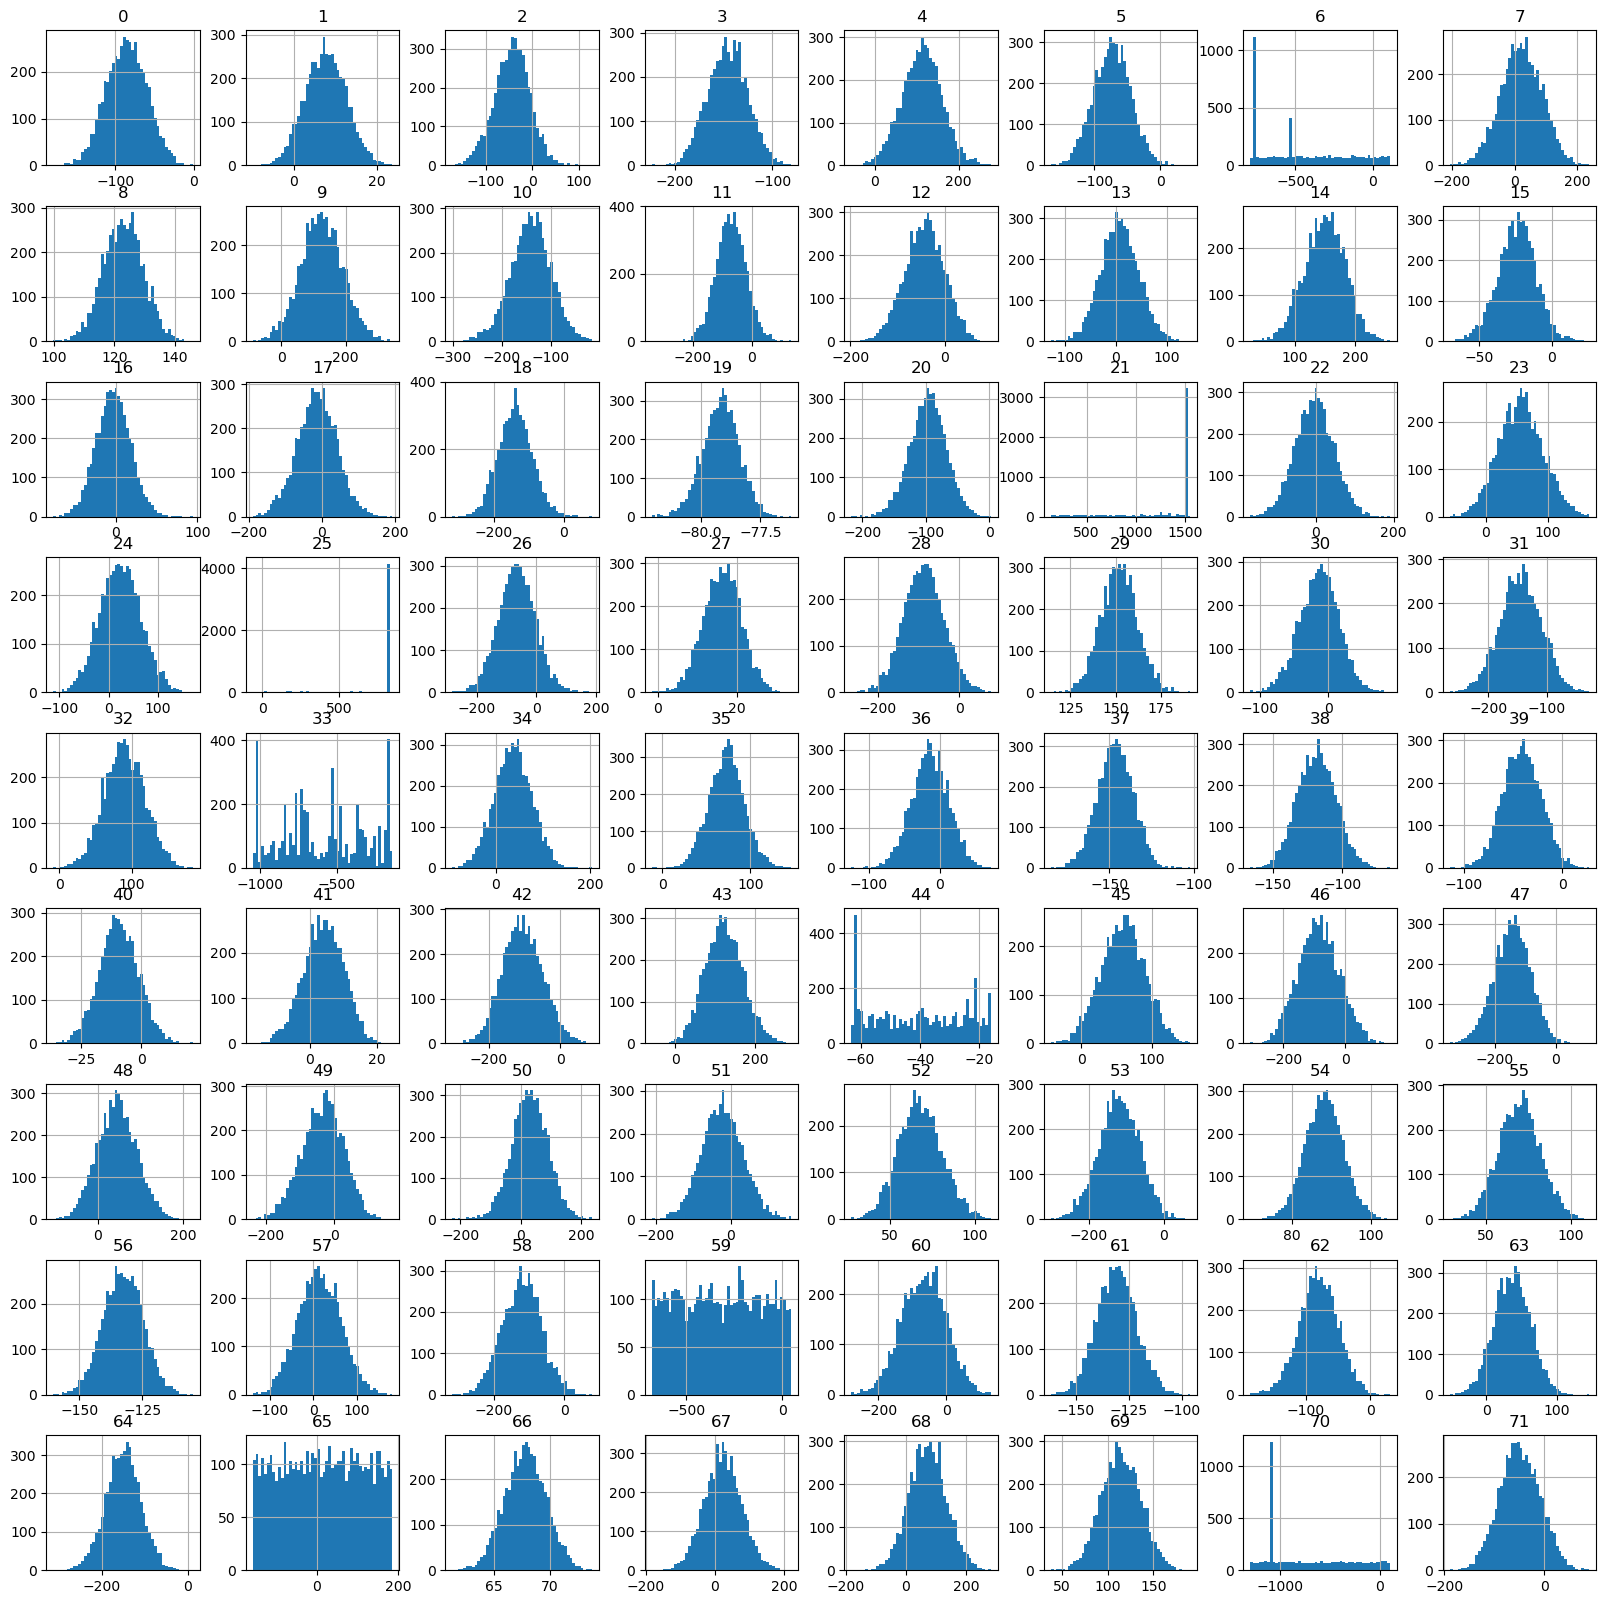

In [25]:
df_samples.hist(figsize=[20, 20], bins=50);

Видим в столбцах 6, 21, 25, 33, 44, 59, 65 и 70 не нормальное распределение. Пробовал его удалять, добавляло парочку процентов к acc faiss

## Нормализация данных

In [26]:
k = 100
n_cells = 333

Пробовал различные скейлеры и самый лучший оказался standard

In [27]:
scaler = StandardScaler()
df_base2 = scaler.fit_transform(df_base)
df_train2 = scaler.transform(df_train)
df_valid2 = scaler.transform(df_valid)
dims = df_base2.shape[1]
#n_cells = 10
# how many cells
quantizer2 = faiss.IndexFlatL2(dims)
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells)
idx_l2.nprobe= 10

In [28]:
idx_l2.train(np.ascontiguousarray(df_base2[:50000, :]).astype('float32'))
idx_l2.add(np.ascontiguousarray(df_base2).astype('float32'))

In [29]:
vecs, idx = idx_l2.search(np.ascontiguousarray(df_train2).astype('float32'), k)

вычисление accuracy 

In [119]:
def accuracy_n(targets, predict, base_index=base_index):
    acc = 0
    for target, candidates in zip(targets.tolist(), predict.tolist()):
        acc += int(target in [base_index[number] for number in candidates])

    return (acc / len(predict) * 100)

In [31]:
print('accuracy@{}: {:.2f}%'.format(k, accuracy_n(targets, idx)))

accuracy@100: 79.18%


Небольшое количество тестов позволило сохранить столбцы, где нет нормального распределения. <br>
А также получить качество свыше 75 acc

Сразу же находим и для валидационной выборки соседей, понадобится в ранжирующей модели

In [32]:
valid_vecs, valid_idx = idx_l2.search(np.ascontiguousarray(df_valid2).astype('float32'), k)

In [33]:
print('accuracy@{}: {:.2f}%'.format(100, accuracy_n(df_valid_target['Expected'], valid_idx)))

accuracy@100: 79.12%


In [34]:
idx.shape

(100000, 100)

In [35]:
idx_data = pd.DataFrame(data=idx, index=df_train.index)
idx_data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Id,,,,,,,,,,,,,,,,,,,,,
0-query,598613,755584,336969,1934845,13374,1136231,480296,583287,2360257,450667,...,363988,914354,2909593,1131378,2815333,390350,1993039,1508618,1091351,714451
1-query,737853,15185,519311,902634,223456,464427,220644,2146806,2524968,643208,...,2133,1003033,2175159,2553517,2311192,2767183,2265852,1747103,203762,1252594
2-query,173120,1784963,2863071,1143288,955831,137853,1368891,1162532,774247,1984148,...,941160,1455779,1837124,2573498,1878000,1004448,2488154,1734858,232932,341603
3-query,1179186,980736,446031,120823,209990,1912243,2259545,410005,556881,1578504,...,1359283,1489591,79393,1357812,630845,677172,61499,39623,1516370,252579
4-query,1304565,1332011,1739638,631912,1160300,836251,1715874,2347303,117899,2398683,...,279476,726816,1781086,906946,2861280,1353050,1004877,1626425,2080810,92820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995-query,1266334,2810652,306280,423874,413594,239491,120109,572148,1523930,2701563,...,2368,1088280,1712778,1859041,1461817,519242,453971,2331618,1376981,2117777
99996-query,317918,2349491,273971,246786,40762,2533380,225640,2068466,554108,287882,...,209197,1579878,2803861,99117,1467104,228253,1228120,273435,106118,1402409
99997-query,1733416,2703195,2865455,813545,81880,541710,916653,34166,309490,1797017,...,2758329,1311133,2207401,1388565,2814911,1242425,2506145,1168841,1833583,1879653


In [36]:
idx_data = pd.melt(idx_data.T)
idx_data

,Id,value
0,0-query,598613
1,0-query,755584
2,0-query,336969
3,0-query,1934845
4,0-query,13374
...,...,...
9999995,99999-query,1494411
9999996,99999-query,512792
9999997,99999-query,588732
9999998,99999-query,1066230


In [37]:
len(list(base_index.items()))

2918139

In [38]:
len(idx_data['value'].values)

10000000

In [39]:
idx_data['value'] = [base_index[value] for value in idx_data['value'].values] 

In [40]:
idx_data

,Id,value
0,0-query,675816-base
1,0-query,877519-base
2,0-query,361564-base
3,0-query,2725256-base
4,0-query,13406-base
...,...,...
9999995,99999-query,1964705-base
9999996,99999-query,569638-base
9999997,99999-query,663496-base
9999998,99999-query,1306363-base


In [41]:
idx_data.columns = ['id_query', 'id_match']
idx_data

,id_query,id_match
0,0-query,675816-base
1,0-query,877519-base
2,0-query,361564-base
3,0-query,2725256-base
4,0-query,13406-base
...,...,...
9999995,99999-query,1964705-base
9999996,99999-query,569638-base
9999997,99999-query,663496-base
9999998,99999-query,1306363-base


для каждой строчки вектора было найдено 100 соседей ближайших и объединено в одной таблице-связки id строчки и совпадения для нее

Далее задача подготовить данные (путем объединения) для ранжирующей модели для трейн выборки и валидационной 

In [42]:
df_base_scaler = pd.DataFrame(df_base2 , index= df_base.index)
df_train_scaler = pd.DataFrame(df_train2 , index= df_train.index)
df_valid_scaler = pd.DataFrame(df_valid2, index= df_valid.index)

In [43]:
df_valid_scaler

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,
100000-query,1.159310,-0.904901,0.811955,1.043508,-0.012313,-0.329532,-0.253186,1.860318,-1.699665,-0.764269,...,0.115241,0.676228,0.275453,0.453765,0.817489,0.693550,0.597167,-0.020121,-0.777845,-1.659674
100001-query,1.304502,0.950910,0.033969,0.615646,0.067603,-0.657373,-1.352459,0.679613,0.540216,-1.107069,...,-0.013756,-0.142349,-0.334949,-0.980522,1.631022,-1.617587,0.360549,0.369533,0.142436,0.545701
100002-query,0.886027,-2.434901,0.955216,-1.185497,-0.320843,0.341078,-1.352459,1.045290,1.193478,0.690080,...,-1.831225,0.140946,-0.118026,-1.347979,-0.044549,1.128563,1.021715,1.204945,1.311027,-0.555197
100003-query,-0.524576,1.623911,1.408637,-0.071830,-0.595916,-2.190386,1.659459,-0.613543,-1.359610,-0.764409,...,0.058666,0.373992,0.540055,-1.217473,1.695932,0.000596,0.949135,1.307485,-0.000064,-0.996489
100004-query,0.269032,-1.704743,0.739119,-1.221980,1.168059,1.550401,1.568739,0.218922,0.821217,-0.347213,...,-1.469227,0.427148,0.498123,-0.004204,1.549868,-0.148400,1.297723,-0.654827,-0.966634,-1.856774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995-query,1.589177,-0.289879,1.344941,1.537359,-0.674999,0.842355,1.378686,1.367212,-0.150169,-0.323048,...,0.439374,1.022174,0.143790,-0.814081,-0.437840,0.957303,-0.137479,-0.155512,1.613758,-0.838686
199996-query,-0.343768,0.559732,1.508635,1.058998,-1.936880,-0.625634,1.737881,-1.041262,-0.016599,-0.782626,...,0.459344,0.163484,0.998530,-0.329332,-1.990527,-2.540145,0.310819,-1.383090,-1.225085,-0.376062
199997-query,1.084917,1.111515,1.740436,0.590027,0.731186,0.309134,1.039623,-0.063464,0.702601,0.688763,...,0.991457,0.220952,0.132424,1.480110,2.066273,0.030580,-1.808538,-0.833142,2.263597,0.472120


In [44]:
df_train_scaler.index

Index(['0-query', '1-query', '2-query', '3-query', '4-query', '5-query',
       '6-query', '7-query', '8-query', '9-query',
       ...
       '99990-query', '99991-query', '99992-query', '99993-query',
       '99994-query', '99995-query', '99996-query', '99997-query',
       '99998-query', '99999-query'],
      dtype='object', name='Id', length=100000)

In [45]:
main_df = idx_data.merge(df_train_scaler, right_on=df_train_scaler.index, left_on='id_query', how= 'left')

In [46]:
df_base_scaler

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,
0-base,-1.159216,0.620350,-0.513723,1.398558,2.269043,-1.160385,-0.282884,0.373663,-0.435627,0.884544,...,1.189049,0.190524,0.073589,-0.894789,-2.262494,-0.510438,0.293004,-0.014051,1.781420,-0.312329
1-base,2.075715,1.060423,-0.652491,-1.002705,-1.157244,-0.500495,1.130652,-0.871900,-0.623904,1.098487,...,-1.272135,0.270119,-0.073570,-1.097493,0.225102,0.014491,1.711283,0.059848,1.853726,-0.281052
2-base,1.285417,-0.343342,0.397878,0.666228,0.853956,-0.973671,1.637293,0.654489,0.828685,0.619635,...,0.086191,0.440159,-1.269686,1.143739,-1.220548,0.773023,0.099669,0.048521,-0.713847,0.365623
3-base,-0.051852,-0.816047,-1.118829,-1.936660,-0.754014,0.461441,0.033281,-0.840347,-0.259958,0.182763,...,0.274980,-1.372853,0.184217,-0.523936,-0.871350,-0.797073,1.014714,0.090076,-0.713847,-0.601807
4-base,0.541780,-0.314538,2.284450,0.303705,-2.276181,-1.422075,-0.020200,0.386656,-0.238676,-0.191508,...,0.716557,0.808178,-0.110496,0.725544,-0.562343,-0.470720,-0.157210,0.920175,-0.713847,1.152406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744755-base,-1.561060,-0.675221,2.145022,1.076266,2.124613,0.855791,-0.868394,-1.423783,0.291078,-1.476259,...,0.284290,0.766146,-0.891135,1.099805,-1.248474,1.543465,-2.082561,0.079706,0.475699,-0.718053
4744759-base,-0.898663,-0.530123,0.579546,-0.608808,0.049398,-0.597886,1.012274,1.821418,0.845243,0.625420,...,0.284428,-0.514378,1.555805,-0.431911,0.493593,-0.395871,-1.619490,-1.040661,-0.713847,-1.030208
4744762-base,-0.433776,-2.064035,-0.690969,0.098481,0.823080,1.788798,-1.352459,-2.001122,0.177137,-0.088426,...,0.757178,1.025621,-0.347378,0.953011,0.439466,0.355254,-0.096658,0.659732,-0.713847,1.257774


In [47]:
main_df= main_df.merge(df_base_scaler, how='left', right_on= df_base_scaler.index,
                      left_on='id_match' )

In [48]:
targets

Id
0-query         675816-base
1-query         366656-base
2-query        1447819-base
3-query        1472602-base
4-query         717819-base
                   ...     
99995-query     811868-base
99996-query    1460772-base
99997-query    2366140-base
99998-query       9252-base
99999-query    2769109-base
Name: Target, Length: 100000, dtype: object

In [49]:
main_df= main_df.merge(targets, how= 'left', right_on= targets.index, left_on= 'id_query')

In [50]:
train_df_main = main_df

Сравним таргет с ид кандидата на метч и если True, то при переводе в int = 1 

In [51]:
train_df_main['class'] = (train_df_main['id_match'] == train_df_main['Target']).astype(int)

In [52]:
train_df_main['class']

0          1
1          0
2          0
3          0
4          0
          ..
9999995    0
9999996    0
9999997    0
9999998    0
9999999    0
Name: class, Length: 10000000, dtype: int64

In [53]:
train_df_main

,id_query,id_match,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,...,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,Target,class
0,0-query,675816-base,1.299518,1.996888,0.063774,-1.879670,1.644099,-0.537626,0.165148,0.279598,...,0.072924,0.427460,-0.496641,0.394758,-0.568302,0.066837,0.995267,0.708902,675816-base,1
1,0-query,877519-base,1.299518,1.996888,0.063774,-1.879670,1.644099,-0.537626,0.165148,0.279598,...,-0.247046,-0.404396,-1.148503,0.412697,-0.375744,0.728224,0.544932,0.270560,675816-base,0
2,0-query,361564-base,1.299518,1.996888,0.063774,-1.879670,1.644099,-0.537626,0.165148,0.279598,...,-0.369458,0.988497,-1.100242,0.280916,-0.492041,0.532096,0.543575,0.090279,675816-base,0
3,0-query,2725256-base,1.299518,1.996888,0.063774,-1.879670,1.644099,-0.537626,0.165148,0.279598,...,-0.360444,-0.335696,-1.196697,0.156157,-1.269117,0.007341,1.964740,0.834797,675816-base,0
4,0-query,13406-base,1.299518,1.996888,0.063774,-1.879670,1.644099,-0.537626,0.165148,0.279598,...,-0.582972,-0.973235,-0.608759,0.321407,-0.678275,0.164748,2.281264,0.505112,675816-base,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,99999-query,1964705-base,-0.113252,0.577083,-0.223273,0.123277,0.693205,-0.521279,1.149390,0.885642,...,0.861493,1.038386,0.292975,0.366737,1.348119,-1.121188,1.285021,-0.799456,2769109-base,0
9999996,99999-query,569638-base,-0.113252,0.577083,-0.223273,0.123277,0.693205,-0.521279,1.149390,0.885642,...,0.061942,0.112904,0.257350,0.056907,0.979424,0.905572,-0.713847,-0.118414,2769109-base,0
9999997,99999-query,663496-base,-0.113252,0.577083,-0.223273,0.123277,0.693205,-0.521279,1.149390,0.885642,...,-0.401426,-0.665160,-0.621709,0.870724,0.042847,0.838010,2.252795,-0.109707,2769109-base,0
9999998,99999-query,1306363-base,-0.113252,0.577083,-0.223273,0.123277,0.693205,-0.521279,1.149390,0.885642,...,0.863707,-0.944738,-0.709160,1.935683,1.087496,0.852236,-0.713847,-0.863046,2769109-base,0


Теперь для валидационной нужно также сделать

In [54]:
valid_idx

array([[2192372, 2177660,  342838, ...,  896536,  406458,  201875],
       [ 157966,   11829,  847800, ..., 1588070, 1257574, 2823570],
       [ 431806,  148400,  451870, ..., 1357812,  170499, 1458040],
       ...,
       [1392746,  349609,  699739, ...,  182570, 1663612, 1660192],
       [ 319526, 2820290, 2253420, ...,  916409, 2032633,  781271],
       [2888788, 2505458,  330927, ...,  953171,  686206, 1879223]])

In [55]:
idx_df_for_valid = pd.DataFrame(data=valid_idx, index=df_valid.index)
idx_df_for_valid = pd.melt(idx_df_for_valid.T)

In [56]:
idx_df_for_valid

,Id,value
0,100000-query,2192372
1,100000-query,2177660
2,100000-query,342838
3,100000-query,574649
4,100000-query,1954150
...,...,...
9999995,199999-query,1874622
9999996,199999-query,2524199
9999997,199999-query,953171
9999998,199999-query,686206


In [57]:
idx_df_for_valid.columns = ['id_query', 'id_match']
idx_df_for_valid['id_match'] = [base_index[number] for number in idx_df_for_valid['id_match'].values]

In [58]:
idx_df_for_valid

,id_query,id_match
0,100000-query,3209652-base
1,100000-query,3181043-base
2,100000-query,368296-base
3,100000-query,645855-base
4,100000-query,2760762-base
...,...,...
9999995,199999-query,2616071-base
9999996,199999-query,3881640-base
9999997,199999-query,1145854-base
9999998,199999-query,787148-base


In [59]:
valid_df_main= idx_df_for_valid.merge(df_valid_scaler, how='left', 
                            left_on='id_query', right_on=df_valid_scaler.index)

In [60]:
valid_df_main = valid_df_main.merge(df_base_scaler,  how='left',
                                    left_on='id_match', right_on=df_base_scaler.index)

In [61]:
valid_df_main

,id_query,id_match,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,...,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y
0,100000-query,3209652-base,1.159310,-0.904901,0.811955,1.043508,-0.012313,-0.329532,-0.253186,1.860318,...,0.457505,0.948873,0.570802,1.213205,0.909869,0.897679,0.018913,0.430446,-0.713847,-1.182590
1,100000-query,3181043-base,1.159310,-0.904901,0.811955,1.043508,-0.012313,-0.329532,-0.253186,1.860318,...,0.190811,0.477240,-0.017377,0.170011,0.557127,0.766064,0.048265,0.406470,-0.713847,-1.284064
2,100000-query,368296-base,1.159310,-0.904901,0.811955,1.043508,-0.012313,-0.329532,-0.253186,1.860318,...,-0.228085,0.011799,0.883902,1.235784,0.495694,0.563696,0.170485,-0.324675,-1.051440,-1.097352
3,100000-query,645855-base,1.159310,-0.904901,0.811955,1.043508,-0.012313,-0.329532,-0.253186,1.860318,...,0.062169,0.174387,0.044383,0.015341,-0.042959,0.317641,0.067884,0.540182,-0.713847,-1.343913
4,100000-query,2760762-base,1.159310,-0.904901,0.811955,1.043508,-0.012313,-0.329532,-0.253186,1.860318,...,-0.061286,0.089266,0.047589,0.222569,0.533942,1.168393,-0.104937,0.162420,-0.005964,-1.245106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,199999-query,2616071-base,1.826818,-0.251821,0.377601,-0.487494,-0.053289,0.448831,-0.776387,-0.978521,...,-0.941161,-0.260792,-0.369923,-1.155177,-0.624182,0.079903,1.531318,1.343524,1.710993,-0.754097
9999996,199999-query,3881640-base,1.826818,-0.251821,0.377601,-0.487494,-0.053289,0.448831,-0.776387,-0.978521,...,-0.519648,0.661627,-0.065979,1.554474,0.095524,-1.219816,-0.178318,1.020516,-0.713847,-1.075549
9999997,199999-query,1145854-base,1.826818,-0.251821,0.377601,-0.487494,-0.053289,0.448831,-0.776387,-0.978521,...,-0.776409,-0.101540,-0.693862,1.456133,-0.867057,-0.443488,0.623426,0.981481,-0.847910,-1.015418
9999998,199999-query,787148-base,1.826818,-0.251821,0.377601,-0.487494,-0.053289,0.448831,-0.776387,-0.978521,...,0.914261,-0.863460,-0.694132,-1.413014,-0.819223,0.220210,0.850775,0.916478,-1.251023,0.109349


In [62]:
valid_df_main = valid_df_main.merge(df_valid_target,  how='left', 
                                    left_on='id_query', right_on=df_valid_target.index)
valid_df_main

,id_query,id_match,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,...,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,Expected
0,100000-query,3209652-base,1.159310,-0.904901,0.811955,1.043508,-0.012313,-0.329532,-0.253186,1.860318,...,0.948873,0.570802,1.213205,0.909869,0.897679,0.018913,0.430446,-0.713847,-1.182590,2676668-base
1,100000-query,3181043-base,1.159310,-0.904901,0.811955,1.043508,-0.012313,-0.329532,-0.253186,1.860318,...,0.477240,-0.017377,0.170011,0.557127,0.766064,0.048265,0.406470,-0.713847,-1.284064,2676668-base
2,100000-query,368296-base,1.159310,-0.904901,0.811955,1.043508,-0.012313,-0.329532,-0.253186,1.860318,...,0.011799,0.883902,1.235784,0.495694,0.563696,0.170485,-0.324675,-1.051440,-1.097352,2676668-base
3,100000-query,645855-base,1.159310,-0.904901,0.811955,1.043508,-0.012313,-0.329532,-0.253186,1.860318,...,0.174387,0.044383,0.015341,-0.042959,0.317641,0.067884,0.540182,-0.713847,-1.343913,2676668-base
4,100000-query,2760762-base,1.159310,-0.904901,0.811955,1.043508,-0.012313,-0.329532,-0.253186,1.860318,...,0.089266,0.047589,0.222569,0.533942,1.168393,-0.104937,0.162420,-0.005964,-1.245106,2676668-base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,199999-query,2616071-base,1.826818,-0.251821,0.377601,-0.487494,-0.053289,0.448831,-0.776387,-0.978521,...,-0.260792,-0.369923,-1.155177,-0.624182,0.079903,1.531318,1.343524,1.710993,-0.754097,336472-base
9999996,199999-query,3881640-base,1.826818,-0.251821,0.377601,-0.487494,-0.053289,0.448831,-0.776387,-0.978521,...,0.661627,-0.065979,1.554474,0.095524,-1.219816,-0.178318,1.020516,-0.713847,-1.075549,336472-base
9999997,199999-query,1145854-base,1.826818,-0.251821,0.377601,-0.487494,-0.053289,0.448831,-0.776387,-0.978521,...,-0.101540,-0.693862,1.456133,-0.867057,-0.443488,0.623426,0.981481,-0.847910,-1.015418,336472-base
9999998,199999-query,787148-base,1.826818,-0.251821,0.377601,-0.487494,-0.053289,0.448831,-0.776387,-0.978521,...,-0.863460,-0.694132,-1.413014,-0.819223,0.220210,0.850775,0.916478,-1.251023,0.109349,336472-base


In [63]:
valid_df_main['class'] = (valid_df_main['id_match'] == valid_df_main['Expected']).astype('int')

У валидационной и трейн выборки готовы классы для бинарной классификации ранжирующей модели

In [64]:
valid_df_main.drop('Expected', axis=1, inplace=True)

In [65]:
train_df_main.drop('Target', axis=1, inplace=True)

Убрал дублирующий столбец, инфо с классом достаточно будет

In [66]:
train_df_main['class'].value_counts(normalize=True)

0    0.992082
1    0.007918
Name: class, dtype: float64

In [67]:
X_train = train_df_main.drop(['id_query', 'id_match', 'class'], axis=1)

In [68]:
X_train

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y
0,1.299518,1.996888,0.063774,-1.879670,1.644099,-0.537626,0.165148,0.279598,-2.296794,-1.459626,...,-0.927103,1.627806,0.072924,0.427460,-0.496641,0.394758,-0.568302,0.066837,0.995267,0.708902
1,1.299518,1.996888,0.063774,-1.879670,1.644099,-0.537626,0.165148,0.279598,-2.296794,-1.459626,...,-0.676032,1.615281,-0.247046,-0.404396,-1.148503,0.412697,-0.375744,0.728224,0.544932,0.270560
2,1.299518,1.996888,0.063774,-1.879670,1.644099,-0.537626,0.165148,0.279598,-2.296794,-1.459626,...,-0.332150,1.723392,-0.369458,0.988497,-1.100242,0.280916,-0.492041,0.532096,0.543575,0.090279
3,1.299518,1.996888,0.063774,-1.879670,1.644099,-0.537626,0.165148,0.279598,-2.296794,-1.459626,...,-0.514269,2.073714,-0.360444,-0.335696,-1.196697,0.156157,-1.269117,0.007341,1.964740,0.834797
4,1.299518,1.996888,0.063774,-1.879670,1.644099,-0.537626,0.165148,0.279598,-2.296794,-1.459626,...,-0.281062,1.725501,-0.582972,-0.973235,-0.608759,0.321407,-0.678275,0.164748,2.281264,0.505112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,-0.113252,0.577083,-0.223273,0.123277,0.693205,-0.521279,1.149390,0.885642,-0.902250,-0.794043,...,0.300445,-1.699190,0.861493,1.038386,0.292975,0.366737,1.348119,-1.121188,1.285021,-0.799456
9999996,-0.113252,0.577083,-0.223273,0.123277,0.693205,-0.521279,1.149390,0.885642,-0.902250,-0.794043,...,-1.076139,-0.551359,0.061942,0.112904,0.257350,0.056907,0.979424,0.905572,-0.713847,-0.118414
9999997,-0.113252,0.577083,-0.223273,0.123277,0.693205,-0.521279,1.149390,0.885642,-0.902250,-0.794043,...,0.507243,-1.602248,-0.401426,-0.665160,-0.621709,0.870724,0.042847,0.838010,2.252795,-0.109707
9999998,-0.113252,0.577083,-0.223273,0.123277,0.693205,-0.521279,1.149390,0.885642,-0.902250,-0.794043,...,-0.520042,-0.931876,0.863707,-0.944738,-0.709160,1.935683,1.087496,0.852236,-0.713847,-0.863046


In [69]:
y_train = train_df_main['class']

In [70]:
y_train

0          1
1          0
2          0
3          0
4          0
          ..
9999995    0
9999996    0
9999997    0
9999998    0
9999999    0
Name: class, Length: 10000000, dtype: int64

In [71]:
X_test = valid_df_main.drop(['id_query', 'id_match', 'class'], axis=1)

In [72]:
y_test = valid_df_main['class']

In [73]:
y_test.value_counts(normalize=True)

0    0.992088
1    0.007912
Name: class, dtype: float64

Фичи и таргеты готовы для обоих выборок, присутствует большой дисбаланс

In [77]:
test_data = Pool(
X_train, y_train)
model = CatBoostClassifier(random_state= RANDOM_STATE,
                           loss_function= 'CrossEntropy', 
                           verbose= 100
 )


Подготовили Пул для кетбуста. Обучаем в лоб целым пакетом данных без разделения

In [78]:
model.fit(test_data)

0:	learn: 0.6243370	total: 1.71s	remaining: 28m 30s
100:	learn: 0.0407446	total: 2m 38s	remaining: 23m 29s
200:	learn: 0.0374055	total: 6m 5s	remaining: 24m 14s
300:	learn: 0.0341075	total: 9m 21s	remaining: 21m 43s
400:	learn: 0.0296789	total: 12m 42s	remaining: 18m 58s
500:	learn: 0.0267362	total: 16m 22s	remaining: 16m 18s
600:	learn: 0.0244602	total: 19m 57s	remaining: 13m 15s
700:	learn: 0.0223425	total: 23m 16s	remaining: 9m 55s
800:	learn: 0.0207874	total: 26m 17s	remaining: 6m 31s
900:	learn: 0.0196310	total: 29m 11s	remaining: 3m 12s
999:	learn: 0.0188448	total: 32m 6s	remaining: 0us


In [80]:
preds = model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [82]:
k=100 
neighbors = 5

In [83]:
pred_probabilities = model.predict_proba(X_test)[:, 1]

Строим матрицу ошибок

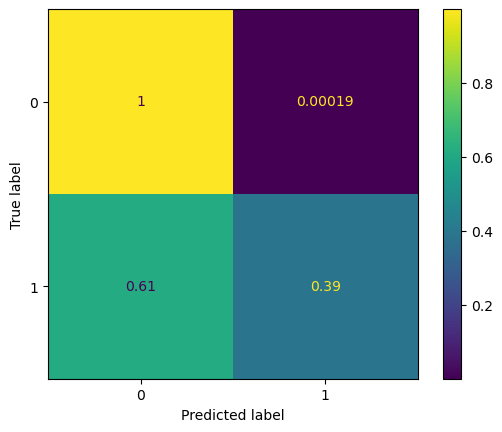

In [97]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true')
plt.show()

In [122]:
#заполняем список кандидатами путем разделения по сотне ответом,
#далее находим пятерку с самой большой вероятностью и добавляем в список
pred_probabilities_series = pd.Series(pred_probabilities)
test_candidates = []
for i in range(0, len(pred_probabilities_series), k):
    query = pred_probabilities_series[i : i+k]
    index = query.sort_values(ascending=False)[:5].index
    test_candidates.append(index)

In [116]:
acc = 0
for target, candidates in zip(targets.values.tolist(), test_candidates):
    acc += int(target in main_df.loc[candidates, 'id_match'].values)
print('accuracy@{}: {:.2f}%'.format(neighbors, acc / len(test_candidates) * 100))

accuracy@5: 36.22%


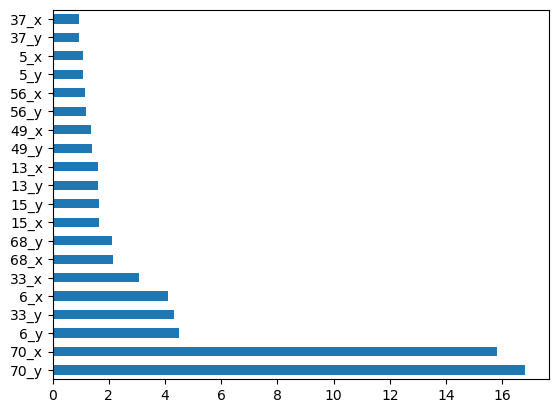

In [104]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Для кетбуста отдельные столбцы имеют наибольшее значение, видать не зря столбец 70 не стали удалять

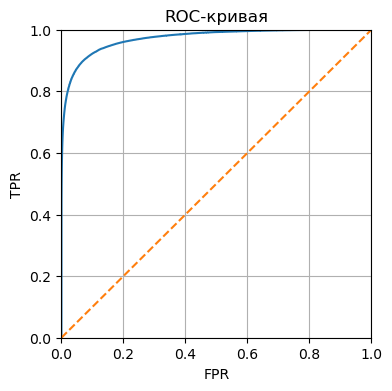

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probabilities)
plt.figure(figsize = (4, 4))
plt.step(fpr, tpr, where='post')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid(True)
plt.show()